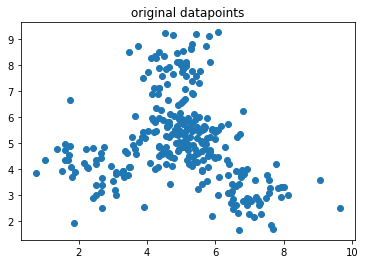

In [7]:
'''
均值漂移聚类模型：假设datapoints成概率密度函数分布，则可以根据函数的分布特征对数据点进行聚类
    优点：无需关心数据量
    聚类点清晰：峰值点
'''
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.cluster import MeanShift, estimate_bandwidth

# load data
def load_data(input_file):
    X = []
    with open(input_file,'r') as f:
        for line in f.readlines():
            data = [float(x) for x in line.split(',')]
            X.append(data)
    return np.array(X)

input_file='data_multivar.txt'
X = load_data(input_file)
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.title('original datapoints')
plt.show()

Number of clusters in input data = 8
Labels : [0 1 2 3 4 5 6 7]
0  ->  [[5.35 4.48 0.  ]
 [6.72 5.37 0.  ]
 [3.57 5.25 0.  ]
 [4.91 5.52 0.  ]
 [5.79 4.09 0.  ]]
centroid :  [5.18421569 5.22176471 0.        ]
1  ->  [[6.08 3.01 1.  ]
 [7.32 2.71 1.  ]
 [7.94 2.91 1.  ]
 [5.62 3.42 0.  ]
 [7.   2.86 1.  ]]
centroid :  [6.89621622 3.07513514 1.        ]
2  ->  [[4.77 7.65 1.  ]
 [5.51 7.32 1.  ]
 [4.77 9.15 1.  ]
 [5.04 8.56 1.  ]
 [3.74 8.74 1.  ]]
centroid :  [4.92457143 7.98457143 1.        ]
3  ->  [[2.25 4.07 1.  ]
 [3.49 4.08 1.  ]
 [2.5  4.35 1.  ]
 [2.22 4.78 1.  ]
 [1.7  4.53 1.  ]]
centroid :  [2.87172414 3.91206897 1.        ]


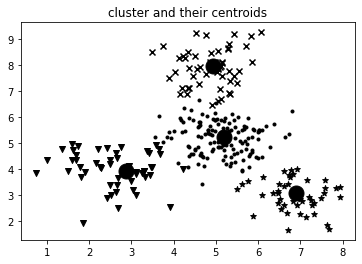

In [12]:
# 设置带宽参数
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples = len(X))

# 训练模型
meanshift_estimator = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_estimator.fit(X)

# 提取标记
labels = meanshift_estimator.labels_ #模型训练之后，已经为数据打好Labels

centroids = meanshift_estimator.cluster_centers_
num_clusters = len(np.unique(labels))
print("Number of clusters in input data =",num_clusters)
print("Labels :",np.unique(labels))
# 集群可视化：迭代数据点
plt.figure()
markers = '.*xv'
for i,marker in zip(range(num_clusters),markers):
    plt.scatter(X[labels==i,0],X[labels==i,1],marker=marker,color='k')
    print(i," -> ",X[labels==i][:5])
    centroid = centroids[i]
    print("centroid : ",centroid)
    plt.plot(centroid[0],centroid[1],marker='o',markerfacecolor='k',markeredgecolor='k',markersize=15)

plt.title("cluster and their centroids")
plt.show()